<center>
<img src="img/logo.jpeg" width=1000 height=800 />
    </center>

In [1]:
import verticapy as vp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
vp.__version__

%matplotlib inline

In [2]:
# Create new connection with database
vp.new_connection({"host": "localhost",
                   "port": "5433",
                   "database": "VMart",
                   "password": "",
                   "user": "dbadmin"},
                   name = "Vertica_New_Connection")
# Connect with the database
vp.connect("Vertica_New_Connection")

In [3]:
# Drop any schema with insurance_data name
vp.drop("insurance", method="schema")
# Create new schema with name insurrance_data
vp.create_schema("insurance", True)

True

## Read dataset

The table "insurance"."insurance" has been successfully created.


,123ageInt,AbcsexVarchar(20),"123bmiNumeric(8,4)",123childrenInt,010smokerBoolean,AbcregionVarchar(20),123chargesFloat
1,18,female,20.79,0,❌,southeast,1607.5101
2,18,female,21.66,0,✅,northeast,14283.4594
3,18,female,24.09,1,❌,southeast,2201.0971
4,18,female,25.08,0,❌,northeast,2196.4732
5,18,female,26.315,0,❌,northeast,2198.18985
6,18,female,26.73,0,❌,southeast,1615.7667
7,18,female,27.28,3,✅,southeast,18223.4512
8,18,female,28.215,0,❌,northeast,2200.83085
9,18,female,29.165,0,❌,northeast,7323.734819
10,18,female,30.115,0,❌,northeast,2203.47185

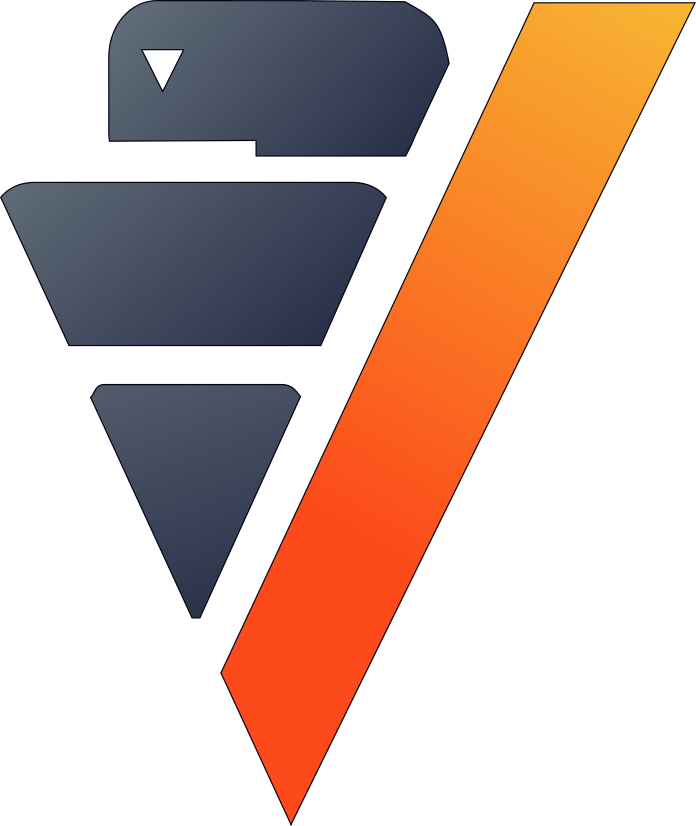

In [4]:
# Read the dataset
insurance_data = vp.read_csv("data/insurance.csv", schema = "insurance")
display(insurance_data)

## Data Exploration

First step is to explore the data, as we see the data contains 1338 record with 7 features:
* age: age of the client
* sex: insurance contractor gender: female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: whether the client is a smoker or not
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

,count,percent
"""age""",1338.0,100.0
"""sex""",1338.0,100.0
"""bmi""",1338.0,100.0
"""children""",1338.0,100.0
"""smoker""",1338.0,100.0
"""region""",1338.0,100.0
"""charges""",1338.0,100.0

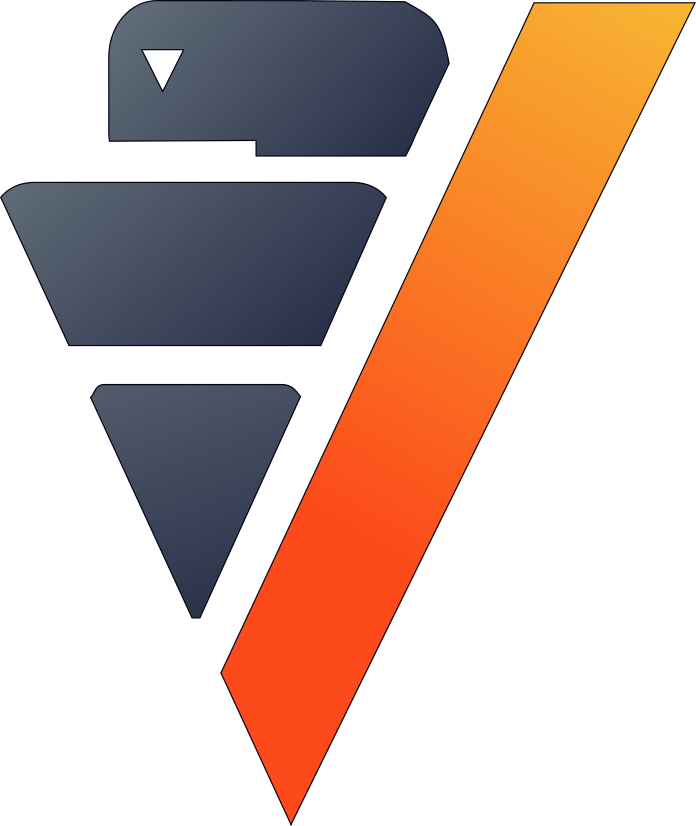

In [5]:
# count the number of non-null entries per column 
insurance_data.count_percent()

,approx_unique
"""sex""",2.0
"""smoker""",2.0
"""region""",4.0

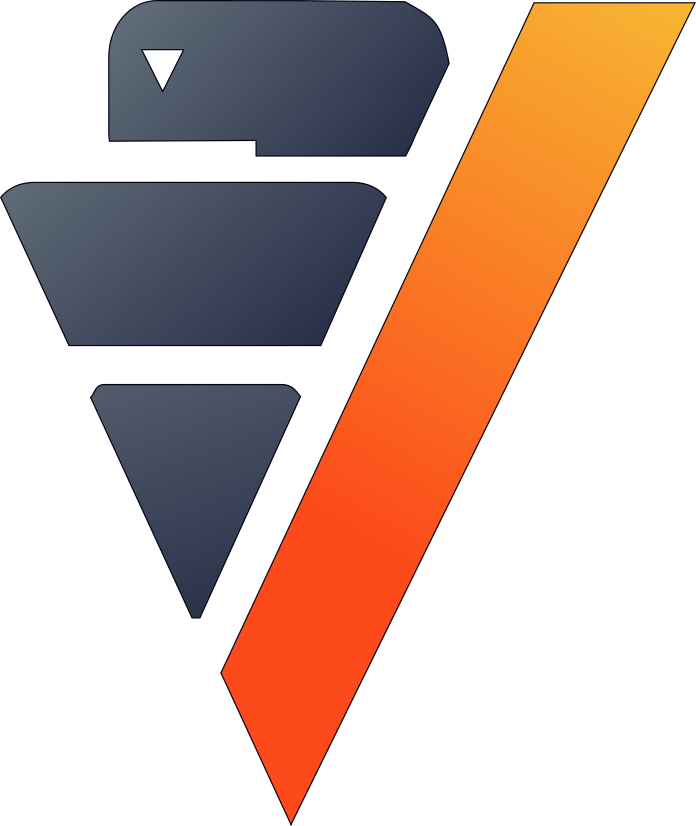

In [6]:
# Check if there are some corrupted values in categorical columns
insurance_data.nunique(columns = ["sex", "smoker", "region"])

The is no null value or corrupted value in categorical features 

,count,mean,std,min,approx_25%,approx_50%,approx_75%,max
"""age""",1338,39.2070254110613,14.0499603792161,18.0,27.0,39.0,51.0,64.0
"""bmi""",1338,30.6633968609865,6.09818691167901,15.96,26.29625,30.4,34.69375,53.13
"""children""",1338,1.0949177877429,1.20549273978192,0.0,0.0,1.0,2.0,5.0
"""charges""",1338,13270.4222651412,12110.011236694,1121.8739,4740.28715,9379.1847,16639.912515,63770.42801

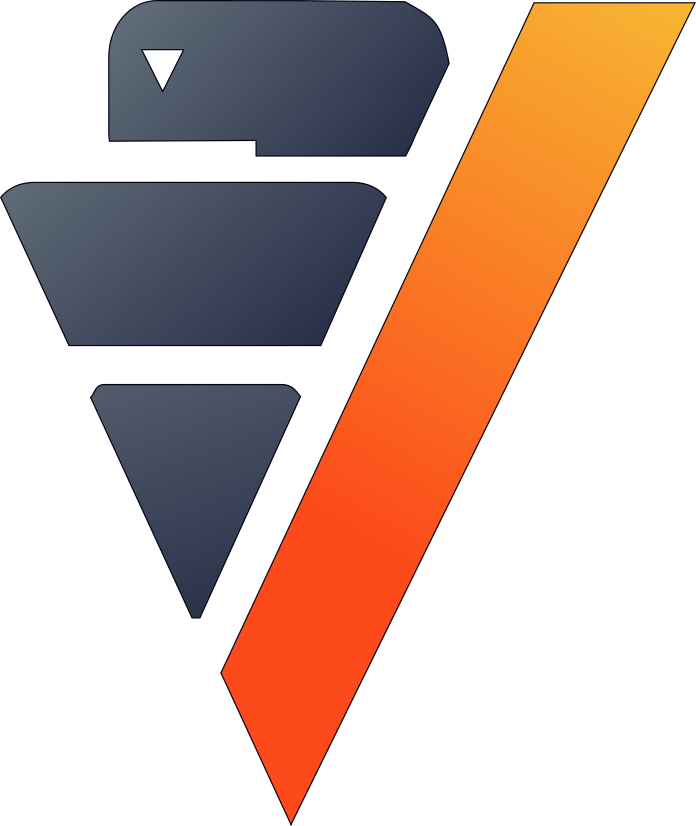

In [7]:
# display description of numerical features
insurance_data[["age", "bmi", "children","charges"]].describe(method="numerical")

,dtype,count,top,top_percent
"""sex""",varchar(20),1338,male,50.523
"""smoker""",boolean,1338,❌,79.522
"""region""",varchar(20),1338,southeast,27.205

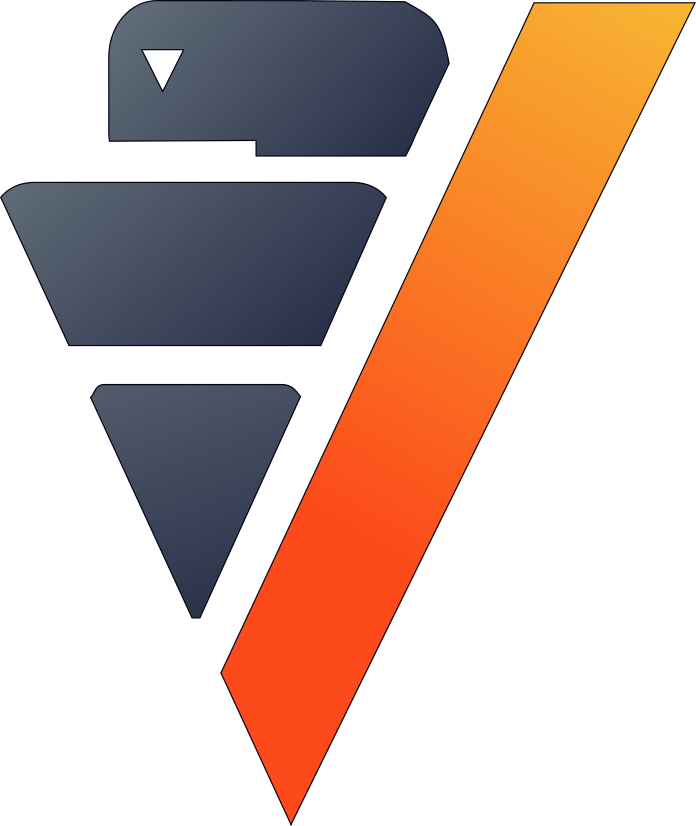

In [8]:
# display description of categorical features
insurance_data[["sex","smoker","region"]].describe(method="categorical")

In the following part we are going to investigate the patterns between the charges and different characteristics of the samples like: gender, ages, number of children, smoker or not,.... 

## Univariate and multivariate analysis
### Charges

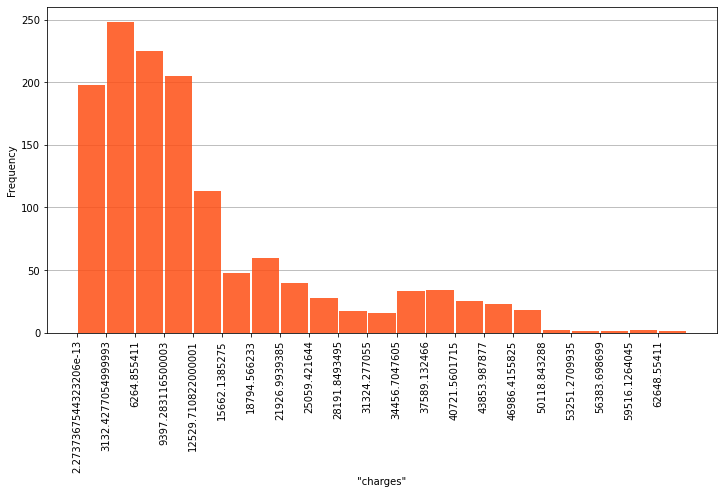

In [9]:
ax = insurance_data["charges"].hist(method = "count",
                            nbins = 20,
                            h=5,
                            color = '#FE5016')

In [10]:
# Boxplot of charges 
insurance_data.hchart(x="charges",  
                      kind = "boxplot",
                      height = 400,
                      width = 800)

We notice the majority of insurance charges are lower than 15K 

### Gender

In [11]:
# Plot the number of different genders
insurance_data.hchart(x = "sex", 
                      kind = "pie",
                      height = 300,
                      width = 800)

In [12]:
# Plot the average charges for different gender
insurance_data.hchart(x = "sex", 
                      y="AVG(charges) AS Average_charges", 
                      kind = "bar",
                      height = 250,
                      width = 800)

The genders have equal representation within the dataset (almost 50%). Moreover,  We can see that the average of charges withing females is lower that the male one.
- We can assume that the gender has slight effect on the insurance charges.

### Smoker

We will add a column for visualization purposes to display the tags `smoker` and `none smoker` in our charts 

,123ageInt,AbcsexVarchar(20),"123bmiNumeric(8,4)",123childrenInt,010smokerBoolean,AbcregionVarchar(20),123chargesFloat,Abcsmoker_statusVarchar(11)
1,18,female,20.79,0,❌,southeast,1607.5101,none smoker
2,18,female,21.66,0,✅,northeast,14283.4594,smoker
3,18,female,24.09,1,❌,southeast,2201.0971,none smoker
4,18,female,25.08,0,❌,northeast,2196.4732,none smoker
5,18,female,26.315,0,❌,northeast,2198.18985,none smoker
6,18,female,26.73,0,❌,southeast,1615.7667,none smoker
7,18,female,27.28,3,✅,southeast,18223.4512,smoker
8,18,female,28.215,0,❌,northeast,2200.83085,none smoker
9,18,female,29.165,0,❌,northeast,7323.734819,none smoker
10,18,female,30.115,0,❌,northeast,2203.47185,none smoker

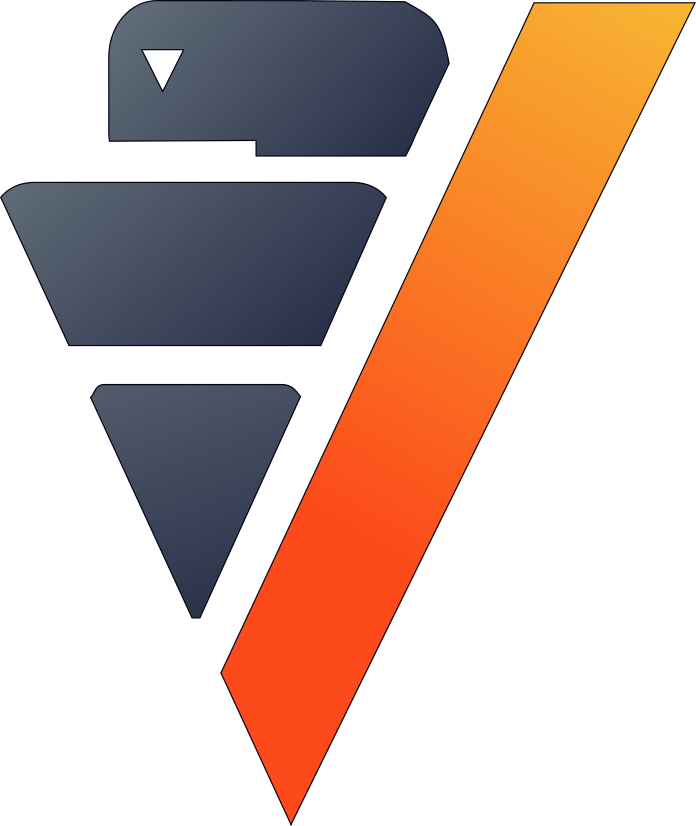

In [13]:
# Add column smoker_status for visualization purposes
insurance_data.case_when("smoker_status",
                  insurance_data["smoker"] == 1, "smoker",
                  "none smoker")

In [14]:
# Plot the count of somker and none smokers
insurance_data.hchart(x = "smoker_status", 
                      kind = "pie",
                      height = 300,
                      width = 800)

The `smoker` individuals represent __20%__ of the samples and `none smoker` represent __80%__

In [15]:
# Plot the average charges for smoker and none smokers
insurance_data.hchart(x = "smoker_status", 
                      y= "AVG(charges) AS Average_charges",
                      kind = "bar",
                      height = 200,
                      width = 900)

It is clear that the average charges of smoker person are almost __4 time__ higher by __32K__ than none smoker person with average of __8.5K__. From this observation we can say that `smoking status` of a person is highly affecting the insurance charges.

In [16]:
# Distribution of the smoker withing gender
insurance_data.hchart(x = "smoker_status",
                      y = "sex",
                      z = "COUNT(sex)",
                      kind = "bar", 
                      height = 250,
                      width = 900)


In [17]:
# The average charges for smoker withing genders
insurance_data.hchart(x = "smoker_status",
                      y = "sex",
                      z = "ROUND(AVG(charges)) AS Average_charges",
                      kind = "bar", 
                      height = 250,
                      width = 900)

We observe that there is more smoking women than men in the samples, however, the average charges of smoking men is higher than the women's one. We can say that our assumption about the relation between gender and charges is present in this case also.

### Number of children 

In [18]:
# Plot the distribution of number of dependent children
insurance_data.hchart(x = "children", 
                      z = "COUNT(children) AS nbr_children",
                      y = "children",
                      kind = "bar", 
                      height = 300,
                      width = 900)

In [19]:
# Boxplot for charges with respect to number of children
insurance_data.hchart(x="charges", 
                      y="children", 
                      kind = "boxplot",
                      height = 400,
                      width = 900)

In [20]:
# Plot the average of insurance charges of different gender with respect to number of children
insurance_data.hchart(x = "Children",
                      y = "sex",
                      z = "ROUND(AVG(charges)) AS Average_charges",
                      kind = "bar", 
                      height = 400,
                      width = 900)

We see that the parents with 5 children have the lowest insurance charges, and the ones that have 2,3, or 4 have higher charges. which is not normal, because more people normally means more insurance charges. We can explain this results by the proportion of the people that have 5 kids where they represent __1.3%__ of the samples.

### Age 

In [21]:
# Distribution of the peoples's age 
insurance_data.hchart(x = "age", 
                      kind = "bar", 
                      h=2,
                      height = 400,
                      width = 900)

The young adults of 18 and 19 years old are significantly frequent comparing to all other ages, they are more than double frequent than every age. 

In [22]:
# Boxplot for charges with respect to age
insurance_data.hchart(x="charges", 
                      y="age", 
                      kind = "boxplot",
                      height = 500,
                      width = 1000)

It is clear that the average charges for young people are less than the old people.

In [23]:
# Distribution of the peoples's age vs bmi
insurance_data.hchart(x = "age", 
                      y = 'AVG(bmi) AS Average_BMI',
                      kind = "bar", 
                      h = 10,
                      aggregate = True,
                      height = 400,
                      width = 900)

This graph explain one reason of high insurance charges of older people, which is __BMI__. Older people tend to have more weight than the standards.

### BMI

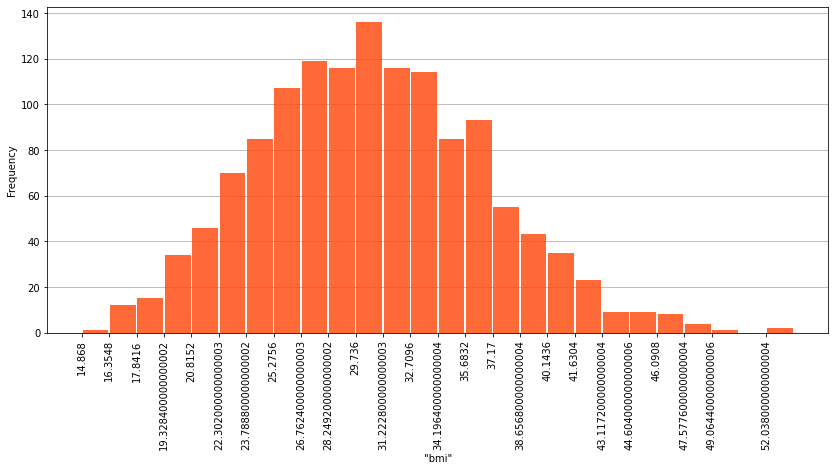

In [24]:
# Distribution of bmi insurance_data.hchart(x = "ws",
ax = insurance_data["bmi"].hist(method = "count",
                            nbins = 25,
                            h=5,
                            color = '#FE5016')
                    

In [25]:
insurance_data.hchart(x="bmi", 
                      y="charges", 
                      kind = "scatter",
                      height = 400,
                      width = 1000)

We categorize the BMI to 4 category based on its value:

|BMI|	Weight Status|
|---|----------------|
|Below 18.5	|Underweight|
|18.5—24.9	|Healthy|
|25.0—29.9	|Overweight|
|30.0 and Above	|Obese|

We can notice that the persons with `bmi` higher than 30 have higher charges, as mentioned above, those people are categorized as __overweight__ individuals.
We will add a column `ws` that referring to weight status of each sample.

,123ageInt,AbcsexVarchar(20),"123bmiNumeric(8,4)",123childrenInt,010smokerBoolean,AbcregionVarchar(20),123chargesFloat,Abcsmoker_statusVarchar(11),AbcwsVarchar(11)
1,18,female,20.79,0,❌,southeast,1607.5101,none smoker,Healthy
2,18,female,21.66,0,✅,northeast,14283.4594,smoker,Healthy
3,18,female,24.09,1,❌,southeast,2201.0971,none smoker,Healthy
4,18,female,25.08,0,❌,northeast,2196.4732,none smoker,Overweight
5,18,female,26.315,0,❌,northeast,2198.18985,none smoker,Overweight
6,18,female,26.73,0,❌,southeast,1615.7667,none smoker,Overweight
7,18,female,27.28,3,✅,southeast,18223.4512,smoker,Overweight
8,18,female,28.215,0,❌,northeast,2200.83085,none smoker,Overweight
9,18,female,29.165,0,❌,northeast,7323.734819,none smoker,Overweight
10,18,female,30.115,0,❌,northeast,2203.47185,none smoker,Obese

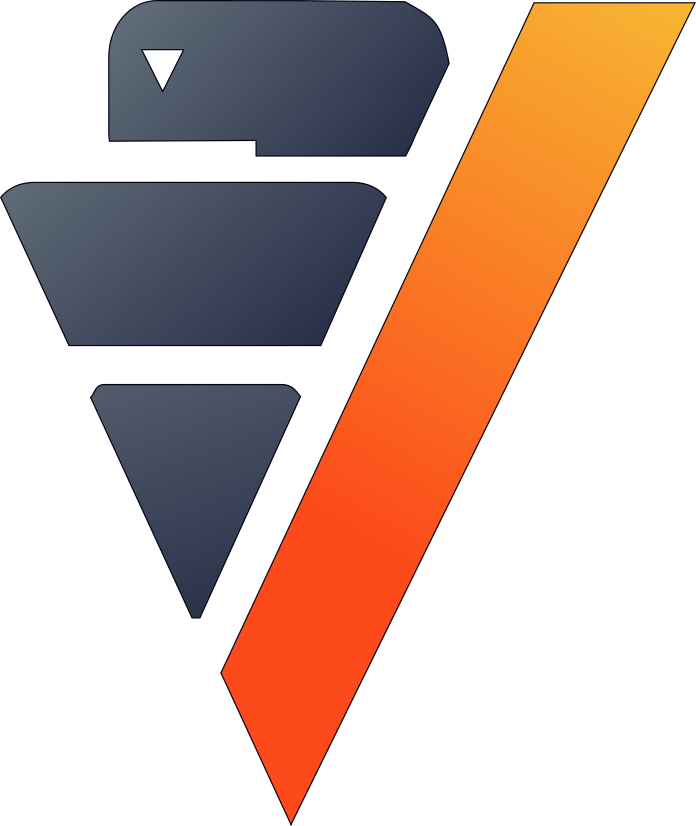

In [26]:
# Add a new feature Weight Status
insurance_data.case_when("ws",
                  insurance_data["bmi"] < 18.5, "Underweight",
                  insurance_data["bmi"] <25, "Healthy",
                  insurance_data["bmi"] <30, "Overweight",
                  "Obese")

In [27]:
insurance_data.hchart(x = "ws", 
                      y = "ws",
                      z = "COUNT(ws) AS Frequency",
                      kind = "bar", 
                      height = 250,
                      width = 900)

In [28]:
# Boxplot of charges w.r.t weight status
insurance_data.hchart(x="charges", 
                      y="ws", 
                      kind = "boxplot",
                      height = 400,
                      width = 900)

In [29]:
# Average charges w.r.t to weights status
insurance_data.hchart(x = "ws", 
                      y="ws", 
                      z = "ROUND(AVG(charges)) As Avg_charges",
                      kind = "bar",
                      height = 300,
                      width = 900)

Underweight people have the lowest charges compare to all the other categorize, and as expected the obese person are more likely to have health issues.

In [30]:
# Display the average score of bmi for every gender
insurance_data.hchart(x = "sex",
                      y = "sex",
                      z = "ROUND(AVG(bmi),2) AS Avg_BMI",
                      kind = "bar", 
                      height = 250,
                      width = 900)

In [31]:
# # Display the distribution of bmi category with respect to evry gender
# insurance_data.hchart(x = "ws",
#                       y = "sex",
#                       z = "COUNT(ws)",
#                       kind = "bar", 
#                       height = 300,
#                       width = 900)

In [32]:
insurance_data.hchart(x = "ws",
                      y = "sex",
                      z = "ROUND(AVG(charges)) AS Avg_charges",
                      kind = "bar", 
                      height = 300,
                      width = 900)

We can observe __obese__ people have higher charges regardless of their gender.

### Region

In [33]:
# Plot the count population in every region
insurance_data.hchart(x = "region", 
                      kind = "pie",
                      height = 300,
                      width = 800)

The distribution of the population on the four regions is uniform (24%-27%)

In [34]:
# Display the average score of bmi for every region
insurance_data.hchart(x = "region",
                      y = "AVG(bmi) AS Average_BMI",
                      kind = "bar", 
                      height = 250,
                      width = 900)

In [35]:
# Display the average charges by the region
insurance_data.hchart(x = "region",
                      y = "AVG(charges) AS Average_Charges",
                      kind = "bar", 
                      height = 250,
                      width = 900)

We see that __southeast__ has the higher __BMI__ average and also has the higher average of charges.

In [36]:
# Average charges of each gender by the region
insurance_data.hchart(x = "sex",
                      y = "region",
                      z = "ROUND(AVG(charges)) AS Average_charges",
                      kind = "bar", 
                      height = 300,
                      width = 900)

In [37]:
# Smoker and none smoker by the region
insurance_data.hchart(x = "smoker_status",
                      y = "region",
                      z = "COUNT(smoker_status)",
                      kind = "bar", 
                      height = 300,
                      width = 900)

In [38]:
# Boxplot of charges by region
# insurance_data.hchart(x="charges", 
#                       y="region", 
#                       kind = "boxplot",
#                       height = 400,
#                       width = 900)

## Feature Engineering

##### Correlation 

In [39]:
# select numerical and categorical features
num_selected_columns = ["age",  "bmi", "children", "charges"]
cat_selected_columns = ["sex","smoker_status", "region", "ws"]
# correlation matrix for numerical features
insurance_data.hchart(x = num_selected_columns,
                     kind = "pearson")

In [40]:
# correlation matrix for categorical features
insurance_data.hchart(x = cat_selected_columns,
                     kind = "cramer")

  0%|          | 0/3 [00:00<?, ?it/s]

In [41]:
# insurance_data.outliers(["age", "bmi"],"global_outliers")
# insurance_data.scatter(["age", "bmi"], catcol = "global_outliers")

We will use Random Forest model because it can deal with categorical features and it is not get affect by the outliers if they exist, and also it doesn't need any scaling for numerical features.

In [42]:
# train_data, test_data = insurance_data.train_test_split(test_size = 0.2, 
#                                                          random_state = 0)

In [43]:
# save our modified dataset to the database
# insurance_data.to_db("insurance.final_insurance_data_reg", relation_type = "table")

In [44]:
# from verticapy.learn.ensemble import RandomForestRegressor

# # define the random forest model
# rf_model_reg = RandomForestRegressor(name = "insurance.randf_model_insurance_reg",
#                                  n_estimators = 15,
#                                  max_features = "auto",
#                                  max_leaf_nodes = 32, 
#                                  sample = 0.7,
#                                  max_depth = 5,
#                                  min_samples_leaf = 5,
#                                  min_info_gain = 0.0,
#                                  nbins = 32)

# # train the model
# rf_model_reg.fit("insurance.final_insurance_data_reg", 
#              ['sex', 'smoker_status', 'region', 'bmi', 'age', 'children'], 
#              "charges")

In [45]:
# regression report for the model
# rf_model_reg.report()

In [46]:
# feature importance for our random forest model
# rf_model_reg.features_importance()

### What is the best insurance tier for every customer?


In the united states the average monthly national cost for health insurance will be $456. However, charges vary across a wide range of health insurance. Understanding the link between health coverage and cost might assist you in selecting the most appropriate health insurance for you.

There are 4 different insurance health plans offered:


|Tiers|Bronze|Silver|Gold|Platinum|
|-----|-----|-----|-----|------|
|You pay|40\% |30\%|20\%|10\%|
|Insurance pays|60\% |70\%|80\%|90\%|

The insurance cost depends on the chosen tier:

__For individuals:__

|Tiers|Bronze|Silver|Gold|Platinum|
|-----|-----|-----|-----|------|
|Cost (\$) per month|448 |483|569|732|
|Cost (\$) per year|5376 |5796|6828|8784|



__For families:__

|Tiers|Bronze|Silver|Gold|Platinum|
|-----|-----|-----|-----|------|
|Cost (\$) per month|1041 |1212|1437|1610|
|Cost (\$) per year|12492 |14544|17244|19320|



Source [link](https://www.ehealthinsurance.com/resources/individual-and-family/how-much-does-individual-health-insurance-cost#:~:text=In%202020%2C%20the%20average%20national,wide%20selection%20of%20health%20plans.)


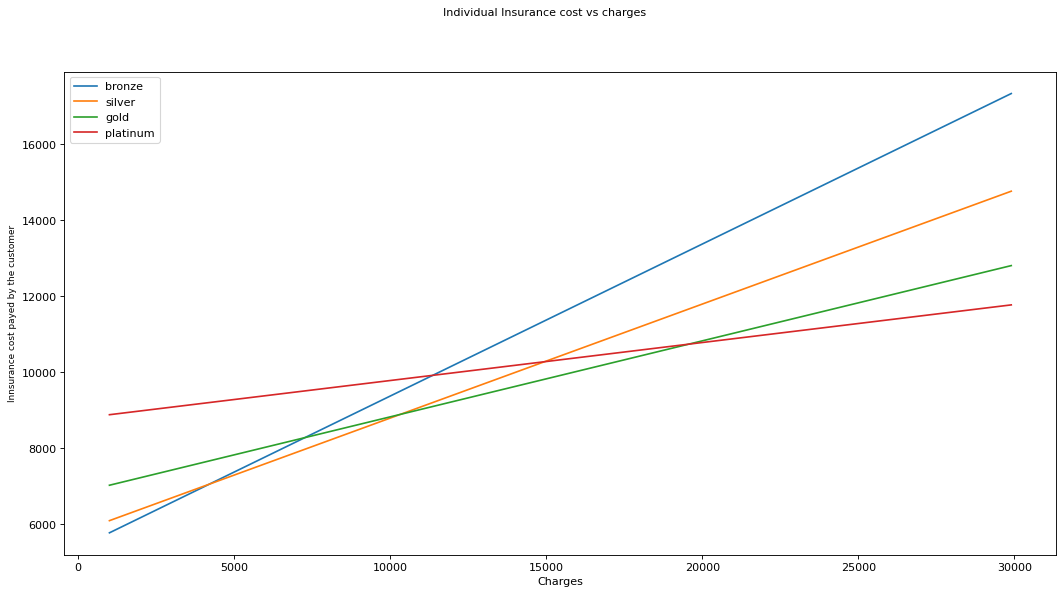

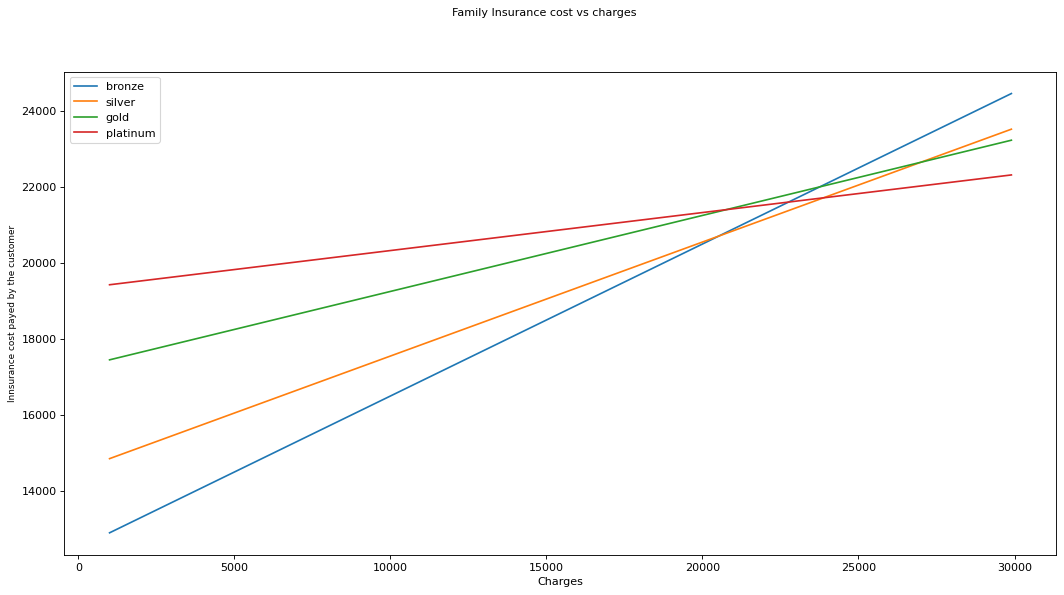

In [47]:
from matplotlib.pyplot import figure

figure(figsize=(16,8), dpi=80)

ind_plans = {'bronze': [5376, 0.4], 'silver': [5796, 0.3], 'gold': [6828, 0.2], 'platinum':[8784, 0.1]}
family_plans = {'bronze': [12492, 0.4], 'silver': [14544, 0.3], 'gold': [17244, 0.2], 'platinum':[19320, 0.1]}
medical_cost_range = range(1000,30000, 100)

bronze_cost = [ind_plans['bronze'][0]+x*ind_plans['bronze'][1] for x in medical_cost_range]
silver_cost = [ind_plans['silver'][0]+x*ind_plans['silver'][1] for x in medical_cost_range]
gold_cost = [ind_plans['gold'][0]+x*ind_plans['gold'][1] for x in medical_cost_range]
platinum_cost = [ind_plans['platinum'][0]+x*ind_plans['platinum'][1] for x in medical_cost_range]


plt.plot(medical_cost_range, bronze_cost, label='bronze')
plt.plot(medical_cost_range, silver_cost, label='silver')
plt.plot(medical_cost_range, gold_cost,label='gold')
plt.plot(medical_cost_range,platinum_cost,label='platinum')
plt.legend()
plt.suptitle('Individual Insurance cost vs charges', fontsize=10)
plt.xlabel('Charges', fontsize=10)
plt.ylabel('Innsurance cost payed by the customer', fontsize=8)
plt.show()


figure(figsize=(16,8), dpi=80)
bronze_cost = [family_plans['bronze'][0]+x*family_plans['bronze'][1] for x in medical_cost_range]
silver_cost = [family_plans['silver'][0]+x*family_plans['silver'][1] for x in medical_cost_range]
gold_cost = [family_plans['gold'][0]+x*family_plans['gold'][1] for x in medical_cost_range]
platinum_cost = [family_plans['platinum'][0]+x*family_plans['platinum'][1] for x in medical_cost_range]


plt.plot(medical_cost_range, bronze_cost, label='bronze')
plt.plot(medical_cost_range, silver_cost, label='silver')
plt.plot(medical_cost_range, gold_cost,label='gold')
plt.plot(medical_cost_range,platinum_cost,label='platinum')
plt.legend()
plt.suptitle('Family Insurance cost vs charges', fontsize=10)
plt.xlabel('Charges', fontsize=10)
plt.ylabel('Innsurance cost payed by the customer', fontsize=8)
plt.show()

In [48]:
# Add a new feature Weight Status
# insurance_data.case_when("insurance_tier",
#                   insurance_data["charges"] <= 5000, "bronze",
#                   insurance_data["charges"] <=10000, "silver",
#                   insurance_data["charges"] <= 20000, "gold",
#                   "platinum")

# insurance_data.hchart(x = "insurance_tier",
#                       kind = "bar", 
#                       height = 250,
#                       width = 900)

,123ageInt,AbcsexVarchar(20),"123bmiNumeric(8,4)",123childrenInt,010smokerBoolean,AbcregionVarchar(20),123chargesFloat,Abcsmoker_statusVarchar(11),AbcwsVarchar(11),Abcinsurance_tier_2Varchar(8)
1,18,female,20.79,0,❌,southeast,1607.5101,none smoker,Healthy,bronze
2,18,female,21.66,0,✅,northeast,14283.4594,smoker,Healthy,gold
3,18,female,24.09,1,❌,southeast,2201.0971,none smoker,Healthy,bronze
4,18,female,25.08,0,❌,northeast,2196.4732,none smoker,Overweight,bronze
5,18,female,26.315,0,❌,northeast,2198.18985,none smoker,Overweight,bronze
6,18,female,26.73,0,❌,southeast,1615.7667,none smoker,Overweight,bronze
7,18,female,27.28,3,✅,southeast,18223.4512,smoker,Overweight,bronze
8,18,female,28.215,0,❌,northeast,2200.83085,none smoker,Overweight,bronze
9,18,female,29.165,0,❌,northeast,7323.734819,none smoker,Overweight,silver
10,18,female,30.115,0,❌,northeast,2203.47185,none smoker,Obese,bronze

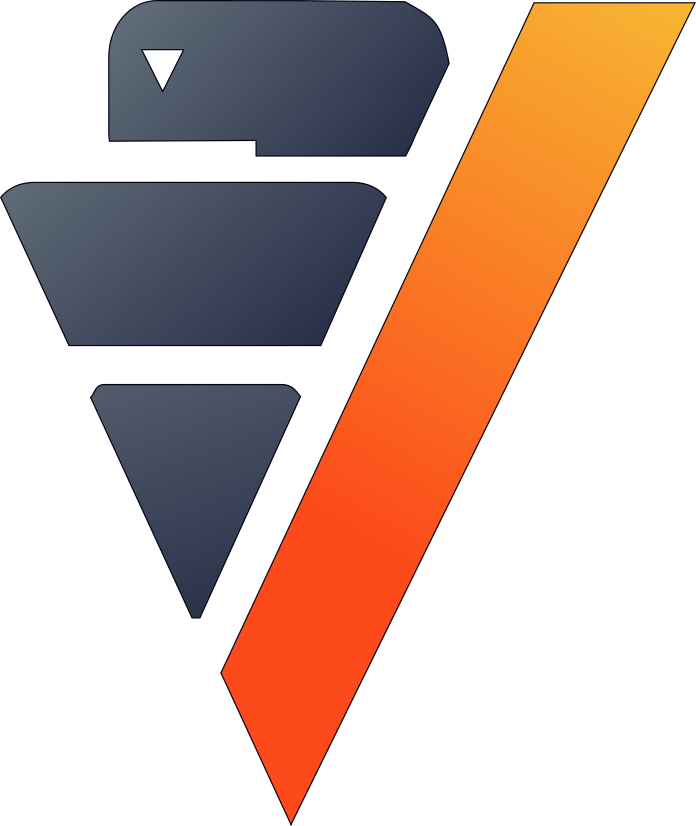

In [49]:
insurance_data.eval(name = "insurance_tier_2", 
             expr = "CASE WHEN charges<=5000 AND children =0 THEN 'bronze' WHEN charges<=20000 AND children <>0 THEN 'bronze' WHEN charges<=10000 AND children =0 THEN 'silver' WHEN charges<=48000 AND children <>0 THEN 'silver' WHEN charges>20000 AND children =0 THEN 'platinum' WHEN charges>48000 AND children <>0 THEN 'platinum' ELSE 'gold' END")

In [50]:
# Add a new feature Weight Status

insurance_data.hchart(x = "insurance_tier_2",
                      kind = "bar", 
                      height = 250,
                      width = 900)

The classes are not balanced, the `bronze` represented by __60%__ of the samples, `silver` by __18%__, `gold` by __13%__, and `platinum` by __9%__ 

In [51]:
# save our modified dataset to the database
# insurance_data.to_db("insurance.final_insurance_data_clas", relation_type = "table")

train_data, test_data = insurance_data.train_test_split(test_size = 0.3, 
                            random_state = 1)

In [52]:
# train_data=train_data.balance(column="insurance_tier_2")
train_data.hchart(x = "insurance_tier_2",
                      kind = "bar", 
                      height = 250,
                      width = 900)


,123ageInteger,AbcsexVarchar(20),"123bmiNumeric(8,4)",123childrenInteger,010smokerBoolean,AbcregionVarchar(20),123chargesFloat,Abcsmoker_statusVarchar(11),AbcwsVarchar(11),Abcinsurance_tier_2Varchar(8)
1,18,female,26.315,0,❌,northeast,2198.18985,none smoker,Overweight,bronze
2,18,female,26.73,0,❌,southeast,1615.7667,none smoker,Overweight,bronze
3,18,female,29.165,0,❌,northeast,7323.734819,none smoker,Overweight,silver
4,18,female,30.115,0,❌,northeast,2203.47185,none smoker,Obese,bronze
5,18,female,30.115,0,❌,northeast,21344.8467,none smoker,Obese,platinum
6,18,female,31.13,0,❌,southeast,1621.8827,none smoker,Obese,bronze
7,18,female,38.28,0,❌,southeast,1631.8212,none smoker,Obese,bronze
8,18,female,39.16,0,❌,southeast,1633.0444,none smoker,Obese,bronze
9,18,female,39.82,0,❌,southeast,1633.9618,none smoker,Obese,bronze
10,18,male,21.565,0,✅,northeast,13747.87235,smoker,Healthy,gold

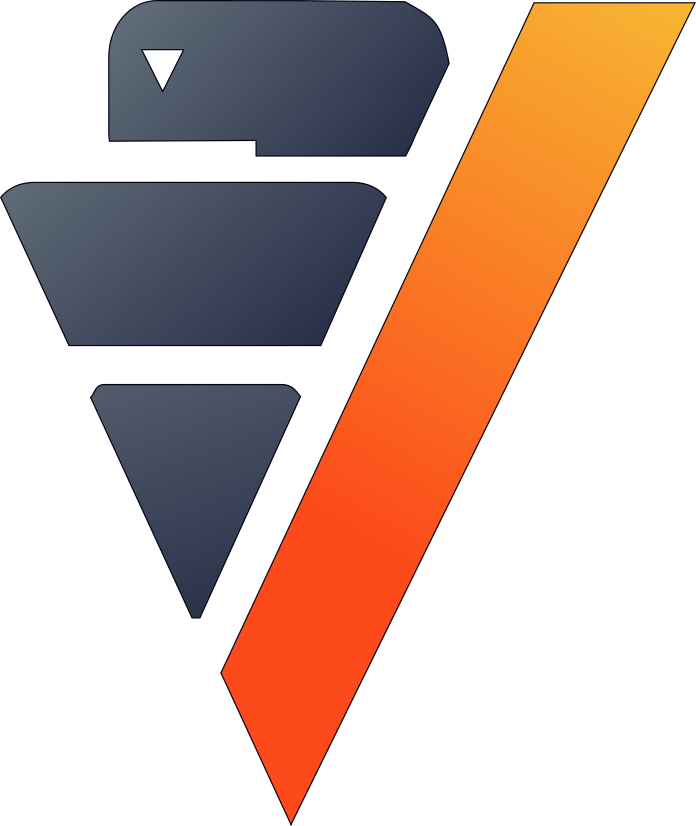

In [53]:
train_data.to_db("insurance.final_train_insurance_data_clas", relation_type = "table")
test_data.to_db("insurance.final_test_insurance_data_clas", relation_type = "table")

In [54]:
from verticapy.learn.ensemble import RandomForestClassifier
from verticapy.learn.model_selection import grid_search_cv




# define the random forest model
rf_model_classifier = RandomForestClassifier(name = "insurance.randf_model_insurance_classifier",
                                 n_estimators = 20,
                                 max_features = "auto",
                                 max_leaf_nodes = 32, 
                                 sample = 1.0,
                                 max_depth = 6,
                                 min_samples_leaf = 5,
                                 min_info_gain = 0.0,
                                 nbins = 32)

predictors = ['sex', 'smoker_status', 'region', 'ws', 'age', 'children']
target = "insurance_tier_2"
# train the model
rf_model_classifier.fit("insurance.final_train_insurance_data_clas", 
             predictors, 
             target)



# param_grid = {
# "n_estimators" : [10,20],
# "max_features" : ["auto","max"],
# "max_depth" : [5,10],
# "min_samples_leaf" : list(range(1,20, 2)),
# }

# gcv = grid_search_cv(rf_model_classifier,
#                      param_grid,
#                      metric = "f1",
#                      input_relation ="insurance.final_train_insurance_data_clas",
#                      X = predictors, 
#                      y = response,
#                      pos_label = "platinum")
# display(gcv)



call_string
SELECT rf_classifier('insurance.randf_model_insurance_classifier', 'insurance.final_train_insurance_data_clas', 'insurance_tier_2', '"sex", "smoker_status", "region", "ws", "age", "children"' USING PARAMETERS exclude_columns='', ntree=20, mtry=3, sampling_size=1, max_depth=6, max_breadth=32, min_leaf_size=5, min_info_gain=0, nbins=32);

details
  predictor  |     type      
-------------+---------------
     sex     |char or varchar
smoker_status|char or varchar
   region    |char or varchar
     ws      |char or varchar
     age     |      int      
  children   |      int      


Additional Info
       Name       |Value
------------------+-----
    tree_count    | 20  
rejected_row_count|  0  
accepted_row_count| 936 

,bronze,gold,platinum,silver
auc,0.9806096891920897,0.9790711346266904,0.9676872273026117,0.9594075827538683
prc_auc,0.9854782725429647,0.93383048924262,0.876110736629009,0.9055868874971382
accuracy,0.9508547008547008,0.9711538461538461,0.9155982905982906,0.9262820512820513
log_loss,0.0773204488056965,0.0444091036885125,0.0429155074726993,0.0766055955299951
precision,0.9303482587064676,0.8721804511278195,0.49645390070921985,0.75
recall,0.9929203539823008,0.9206349206349206,0.8974358974358975,0.8802395209580839
f1_score,0.9606164383561644,0.8957528957528956,0.6392694063926941,0.8099173553719009
mcc,0.8988170877198689,0.879460733163211,0.6294883724971285,0.7683242706419157
informedness,0.8797128068124895,0.899647266313933,0.8146853146853146,0.8165204052233634
markedness,0.9183362466944556,0.8597271510032864,0.4863910076274589,0.722972972972973

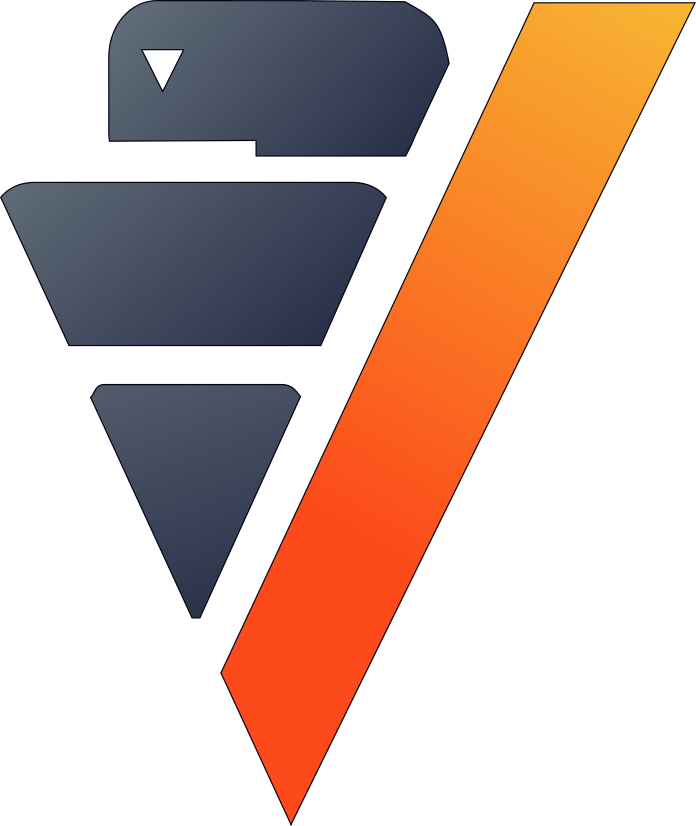

In [55]:
# regression report for the model8 
rf_model_classifier.report()

,importance,sign
age,37.27,1
children,30.13,1
smoker_status,27.19,1
ws,4.25,1
region,0.8,1
sex,0.35,1

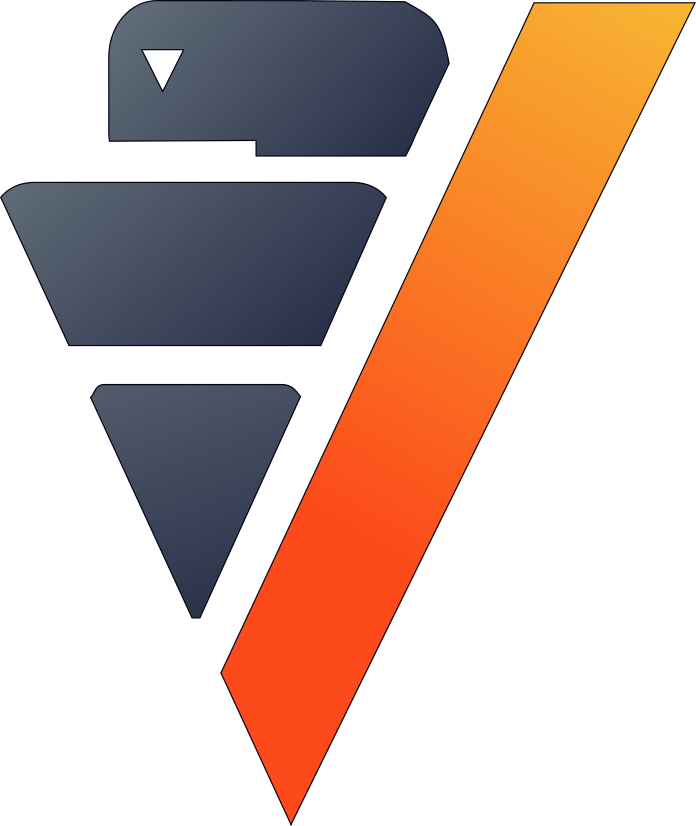

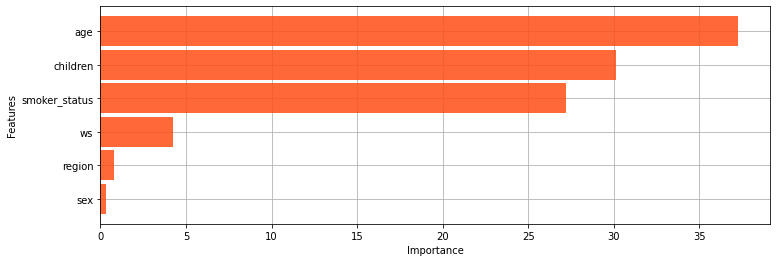

In [56]:
# feature importance for our random forest model
rf_model_classifier.features_importance()

,123ageInteger,AbcsexVarchar(20),"123bmiNumeric(8,4)",123childrenInteger,010smokerBoolean,AbcregionVarchar(20),123chargesFloat,Abcsmoker_statusVarchar(11),AbcwsVarchar(11),Abcinsurance_tier_2Varchar(8),AbcpredictionVarchar(128)
1,18,female,26.315,0,❌,northeast,2198.18985,none smoker,Overweight,bronze,bronze
2,18,female,26.73,0,❌,southeast,1615.7667,none smoker,Overweight,bronze,bronze
3,18,female,29.165,0,❌,northeast,7323.734819,none smoker,Overweight,silver,bronze
4,18,female,30.115,0,❌,northeast,2203.47185,none smoker,Obese,bronze,bronze
5,18,female,30.115,0,❌,northeast,21344.8467,none smoker,Obese,platinum,bronze
6,18,female,31.13,0,❌,southeast,1621.8827,none smoker,Obese,bronze,bronze
7,18,female,38.28,0,❌,southeast,1631.8212,none smoker,Obese,bronze,bronze
8,18,female,39.16,0,❌,southeast,1633.0444,none smoker,Obese,bronze,bronze
9,18,female,39.82,0,❌,southeast,1633.9618,none smoker,Obese,bronze,bronze
10,18,male,21.565,0,✅,northeast,13747.87235,smoker,Healthy,gold,gold

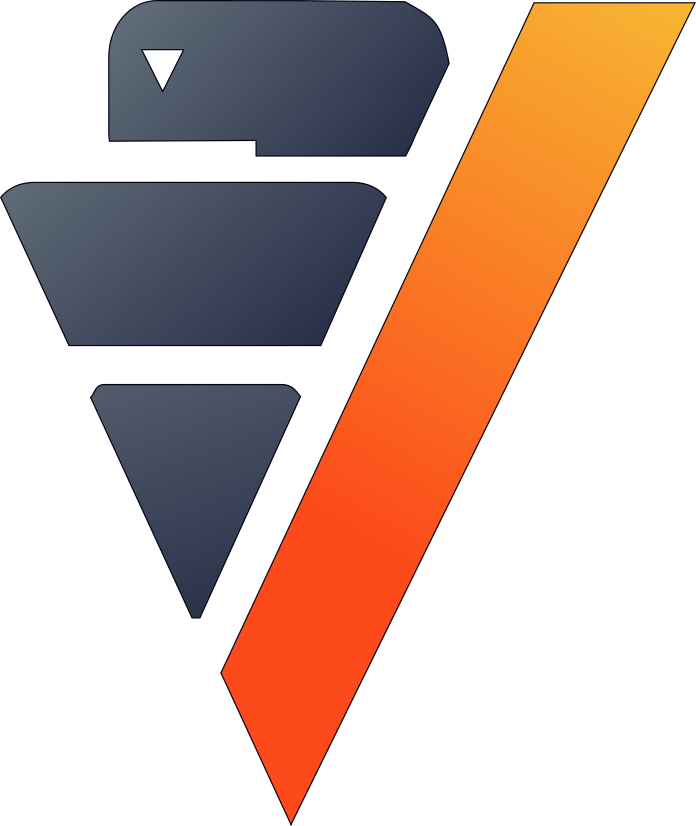

In [57]:
rf_model_classifier.predict(test_data,
                            X=predictors,
                           name="prediction")

,threshold,false_positive,true_positive
1,0.0,1.0,1.0
2,0.0333333333333333,0.711590296495957,1.0
3,0.0666666666666667,0.501347708894879,1.0
4,0.1,0.366576819407008,1.0
5,0.133333333333333,0.256064690026954,0.99646017699115
6,0.166666666666667,0.191374663072776,0.99646017699115
7,0.2,0.161725067385445,0.99646017699115
8,0.233333333333333,0.126684636118598,0.994690265486726
9,0.266666666666667,0.115902964959569,0.992920353982301
10,0.3,0.113207547169811,0.992920353982301

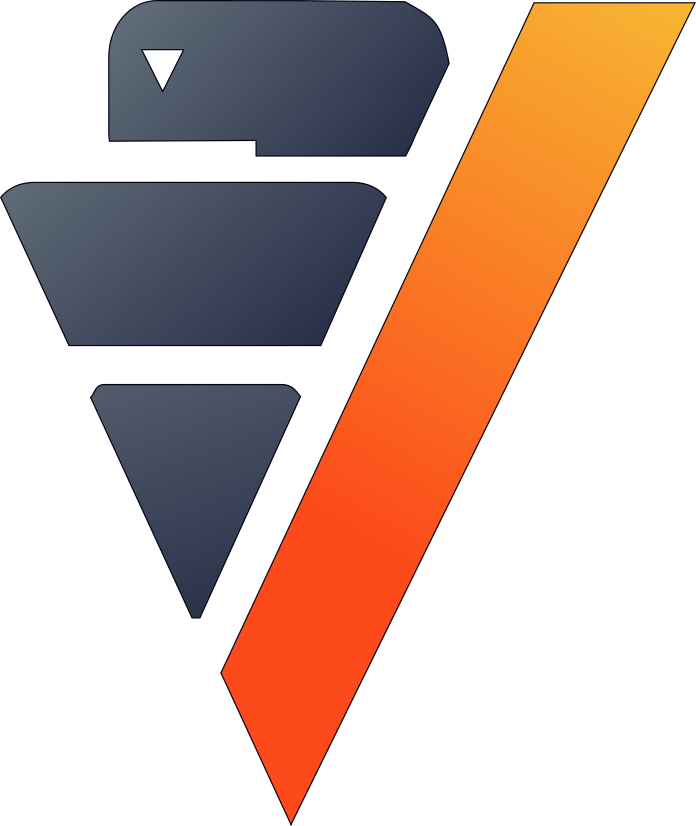

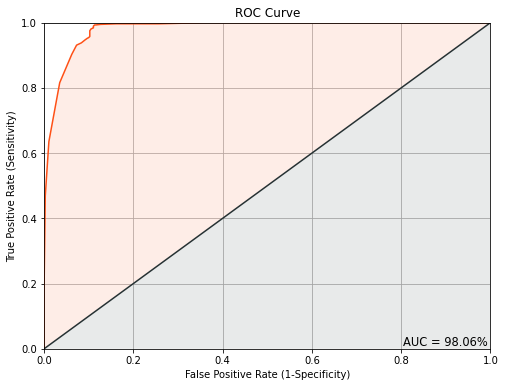

In [58]:
rf_model_classifier.roc_curve(pos_label='bronze')

,threshold,false_positive,true_positive
1,0.0,1.0,1.0
2,0.0333333333333333,0.504938271604938,1.0
3,0.0666666666666667,0.153086419753086,0.928571428571429
4,0.1,0.0493827160493827,0.920634920634921
5,0.133333333333333,0.0222222222222222,0.920634920634921
6,0.166666666666667,0.0160493827160494,0.912698412698413
7,0.2,0.0148148148148148,0.912698412698413
8,0.233333333333333,0.0148148148148148,0.912698412698413
9,0.266666666666667,0.0123456790123457,0.904761904761905
10,0.3,0.0111111111111111,0.904761904761905

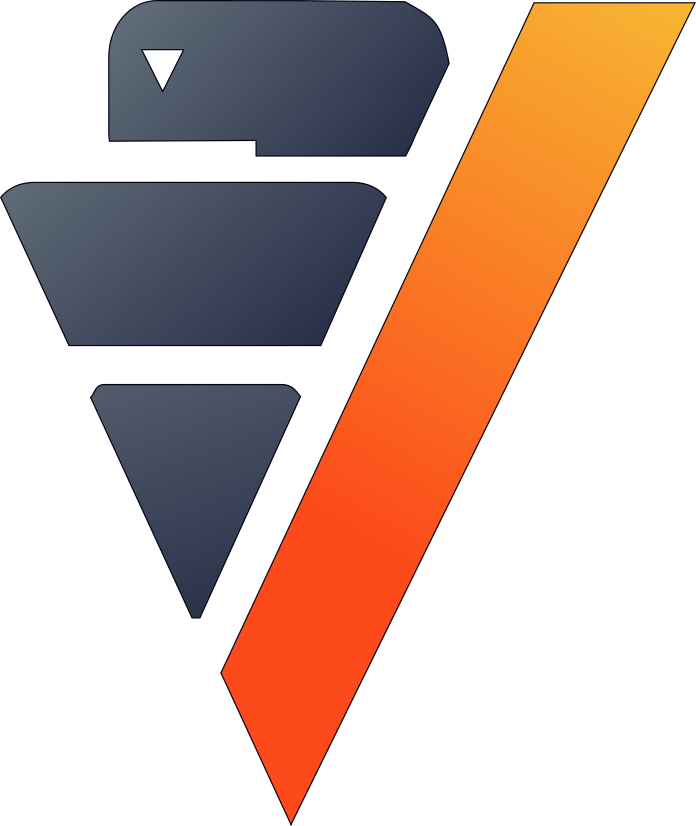

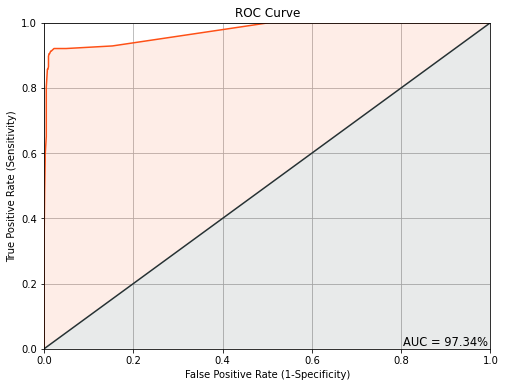

In [59]:
rf_model_classifier.roc_curve(pos_label='gold')

,threshold,false_positive,true_positive
1,0.0,1.0,1.0
2,0.0333333333333333,0.390117035110533,0.976047904191617
3,0.0666666666666667,0.107932379713914,0.898203592814371
4,0.1,0.0637191157347204,0.868263473053892
5,0.133333333333333,0.0533159947984395,0.850299401197605
6,0.166666666666667,0.0533159947984395,0.844311377245509
7,0.2,0.046814044213264,0.844311377245509
8,0.233333333333333,0.0377113133940182,0.844311377245509
9,0.266666666666667,0.0338101430429129,0.838323353293413
10,0.3,0.0312093628088427,0.826347305389222

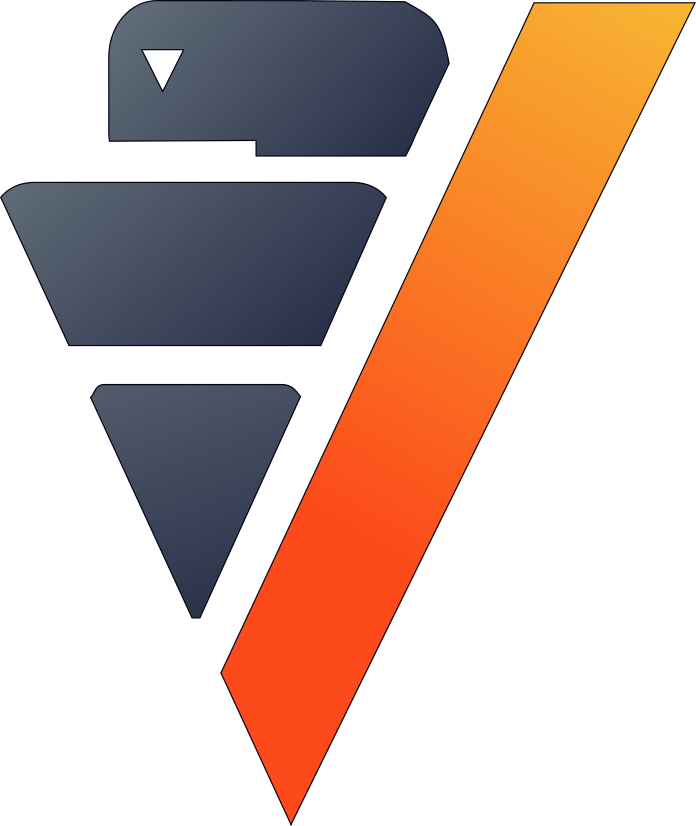

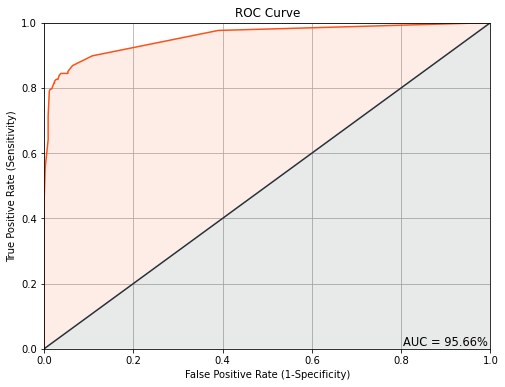

In [60]:
rf_model_classifier.roc_curve(pos_label='silver')

,threshold,false_positive,true_positive
1,0.0,1.0,1.0
2,0.0333333333333333,0.494172494172494,0.987179487179487
3,0.0666666666666667,0.131701631701632,0.935897435897436
4,0.1,0.0256410256410256,0.82051282051282
5,0.133333333333333,0.0104895104895105,0.743589743589744
6,0.166666666666667,0.00582750582750583,0.743589743589744
7,0.2,0.0034965034965035,0.743589743589744
8,0.233333333333333,0.0034965034965035,0.730769230769231
9,0.266666666666667,0.0034965034965035,0.730769230769231
10,0.3,0.00116550116550117,0.730769230769231

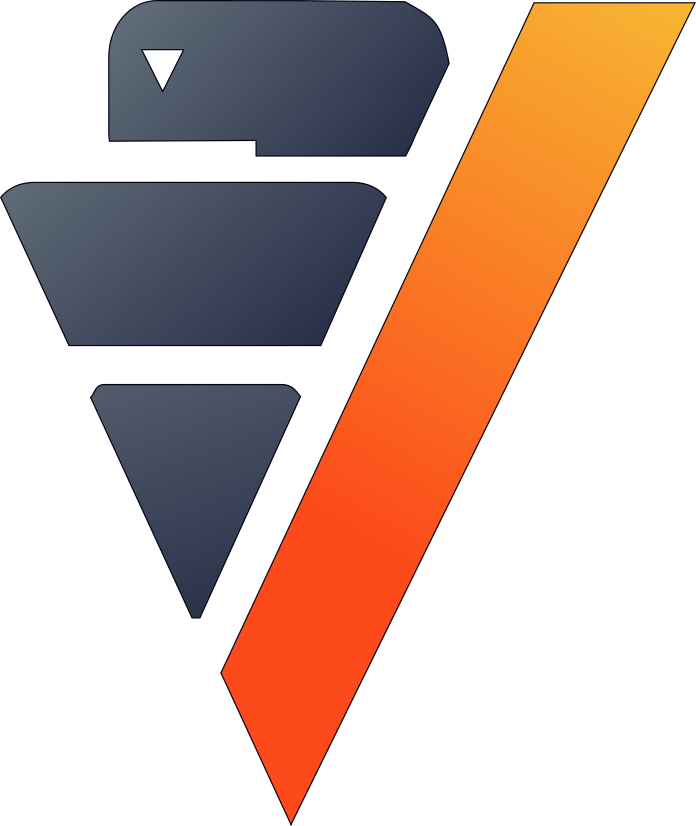

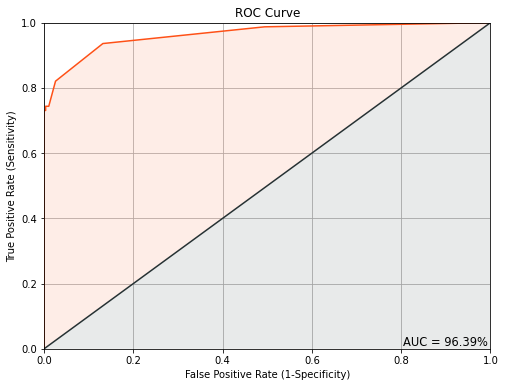

In [61]:
rf_model_classifier.roc_curve(pos_label='platinum')

,bronze,silver,gold,platinum
bronze,236,5,0,0
silver,15,58,2,0
gold,1,2,45,0
platinum,2,6,5,25

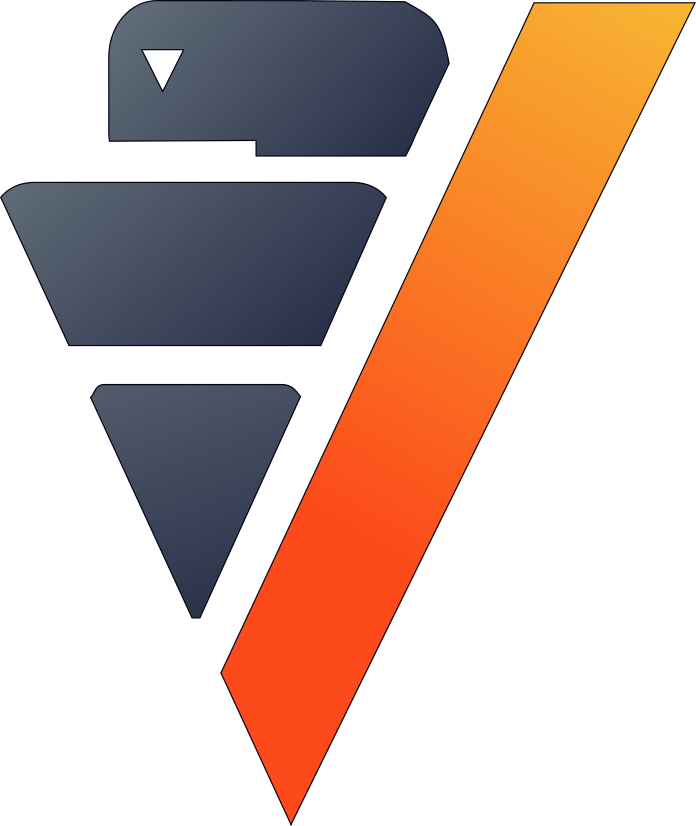

In [80]:
from verticapy.learn.metrics import multilabel_confusion_matrix, f1_score
multilabel_confusion_matrix("insurance_tier_2", 
                            "prediction", 
                            test_data,
                            labels = ['bronze', 'silver', 'gold','platinum'])

In [81]:
f1_score("insurance_tier_2", 
              "prediction",
              test_data)

0